# Test for parallel and joining

In [5]:
BASE_FOLDER = '../'
%run -i ..\utility\feature_extractor\JupyterLoad_feature_extractor.py
file_path_list1 = [r'\dataset\6dB\valve\id_00\abnormal\00000020.wav',
                   r'\dataset\6dB\valve\id_00\normal\00000820.wav']

file_path_list2 = [r'\dataset\6dB\valve\id_02\normal\00000014.wav',
                   r'\dataset\6dB\valve\id_02\abnormal\00000016.wav']
file_target_class1 = [1,
                     0]
file_target_class2 = [0,
                     1]

target_folder = r'/feature_extraction_diagrams/extdia_v1_spor_testout/'
machine = 'valve'
SNR = '6dB'
ID ='00'
%run -i .\extdia_v1_sporadic
# single test
ed = []
ed.append(extdia_v1_sporadic(BASE_FOLDER,0,augment=0, DeviceType=1,fHP = 120))
ed.append(extdia_v1_sporadic(BASE_FOLDER,1,augment=0, DeviceType=1, fHP = 120))

for tc,f in zip(file_target_class1,file_path_list1):
    #print(f)
    ed[0].execute_diagram(f,tc)
    #print(ed[0].outport_akkulist['MEL_den'][0]['para_dict']['wave_filepath'])  
for tc,f in zip(file_target_class2,file_path_list2):
    ed[1].execute_diagram(f,tc)
    #print(ed[1].outport_akkulist['MEL_den'][0]['para_dict']['wave_filepath'])    


joinlist = outport_akkulist_join(exdia_list=ed)
outport_akkulist_tofile(BASE_FOLDER,target_folder,joinlist,machine,SNR,ID)

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load # extractor diagram V1 sporadic focus


,path,abnormal,datafile_idx,MEL_raw,PSD_raw,SNR,machine,ID
0,\dataset\6dB\valve\id_00\abnormal\00000020.wav,1.0,0,\feature_extraction_diagrams\extdia_v1_spor_te...,\feature_extraction_diagrams\extdia_v1_spor_te...,6dB,valve,00
1,\dataset\6dB\valve\id_00\normal\00000820.wav,0.0,1,\feature_extraction_diagrams\extdia_v1_spor_te...,\feature_extraction_diagrams\extdia_v1_spor_te...,6dB,valve,00
2,\dataset\6dB\valve\id_00\normal\00000820.wav,-1.0,2,\feature_extraction_diagrams\extdia_v1_spor_te...,\feature_extraction_diagrams\extdia_v1_spor_te...,6dB,valve,00
3,\dataset\6dB\valve\id_02\normal\00000014.wav,0.0,3,\feature_extraction_diagrams\extdia_v1_spor_te...,\feature_extraction_diagrams\extdia_v1_spor_te...,6dB,valve,00
4,\dataset\6dB\valve\id_02\normal\00000014.wav,-1.0,4,\feature_extraction_diagrams\extdia_v1_spor_te...,\feature_extraction_diagrams\extdia_v1_spor_te...,6dB,valve,00
5,\dataset\6dB\valve\id_02\abnormal\00000016.wav,1.0,5,\feature_extraction_diagrams\extdia_v1_spor_te...,\feature_extraction_diagrams\extdia_v1_spor_te...,6dB,valve,00


In [6]:
BASE_FOLDER = '../'
%run -i ..\utility\feature_extractor\JupyterLoad_feature_extractor.py

#d_MEL_den = pickle.load( open( r'.\extdia_v1_sporadic\pump6dB00_EDiaV1HPaug0_outpMEL_den.pkl', "rb" ))
d_MEL_raw = pickle.load( open( r'.\extdia_v1_spor_testout\valve6dB00_EDiaV1HPaug0TsSl_outpMEL_raw.pkl', "rb" ))
d_PSD_raw = pickle.load( open( r'.\extdia_v1_spor_testout\valve6dB00_EDiaV1HPaug0TsSl_outpPSD_raw.pkl', "rb" ))



load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation


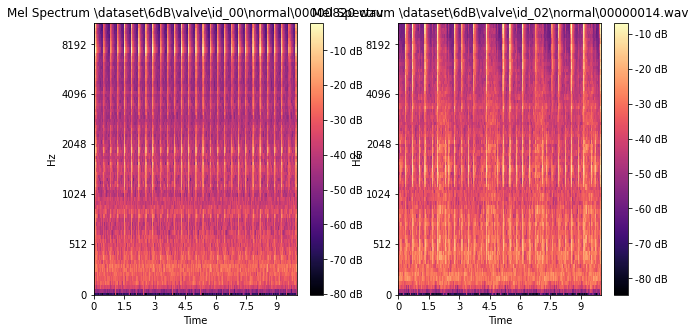

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(121)
feature_extractor_from_dict(d_MEL_raw[1],BASE_FOLDER).plot()
plt.subplot(122)
feature_extractor_from_dict(d_MEL_raw[3],BASE_FOLDER).plot()

In [8]:
test = feature_extractor_from_dict(d_MEL_raw[3],BASE_FOLDER)

In [11]:
test.frame_pack_feature(5).shape

(309, 400)

In [14]:
for i in range(4):
   test =(feature_extractor_from_dict(d_MEL_raw[i],BASE_FOLDER))
   print(test.frame_pack_feature(5).shape)

(309, 400)
(309, 400)
(309, 400)
(309, 400)
